In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Bayesian estimation.

Xinyuan and Sarah are looking for Ajay in a very large one-dimensional shopping mall. Location is specified by a coordinate $X$. They know that, all else being equal, Ajay likes to hang out near the center of the shopping mall. Specifically, the probability distribution of his location is Gaussian with mean $X = 75$ and variance $35$. The only clue they have is a coffee cup at location $X=40$, containing the residue of a coffee that only Math Tools TAs drink (a naturally dried, triple-caffeine Ethiopian heirloom varietal, hand-extracted).
Given the location of the coffee cup, and the aroma and dryness of the coffee residue, they estimate the likelihood of his position, i.e., the probability of finding a cup at that location in that condition given Ajay’s current position, to be a Gaussian with mean $X = 40$ and variance $80$.

In [2]:
def norm_pdf(x, mu, sigma):
    const = 1 / (np.sqrt(2 * np.pi) * sigma)
    y = const * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y / np.sum(y)

---

# a)

Frame this problem as a problem in Bayesian estimation, using appropriate terminology. What is Ajay’s posterior distribution? Draw his prior distribution, likelihood function and posterior distribution on a single plot. (Rather than normpdf, compute the probabilities from the formula for the Gaussian distribution.) What are the mean and variance of the posterior?

In [3]:
def bayes_rule(likelihood, prior):
    posterior = likelihood * prior
    return posterior / np.sum(posterior)

Ajay is a system whose hidden state we infer from observations and a prior expectation over possible states. The state variable $X$ is Ajay's position within the mall. The observation $Y$ is an old coffee cup at a particular location. There exists a likelihood function $P(Y|X)$ which, given a possible location for Ajay $X$, tells us the probability of observing the coffee cup we saw. We also have a prior distribution $P(X)$ which gives the probability of finding Ajay in some location in the absence of any observations.

The prior distribution $P(X)$ encodes our beliefs about Ajay's location in the absence of evidence. Bayes' rule gives an equation for optimally updating our belief in light of incoming evidence. It defines a new distribution $P(X|Y)$, called the posterior, in terms of the likelihood and prior:

$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$.

The posterior $P(X|Y)$ encodes our beliefs about Ajay's location after the observation. The prior, likelihood and posterior are plotted below.

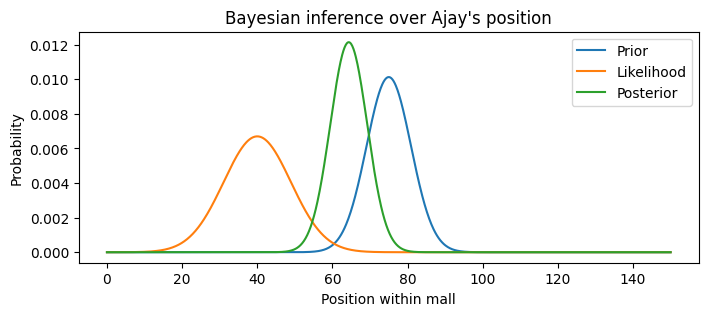

In [4]:
x = np.linspace(0, 150, 1000)
prior = norm_pdf(x, mu=75, sigma=np.sqrt(35))
likelihood = norm_pdf(x, mu=40, sigma=np.sqrt(80))
posterior = bayes_rule(likelihood, prior)

plt.subplots(figsize=(8, 3))
plt.title("Bayesian inference over Ajay's position")
plt.xlabel('Position within mall')
plt.ylabel('Probability')
plt.plot(x, prior, label='Prior')
plt.plot(x, likelihood, label='Likelihood')
plt.plot(x, posterior, label='Posterior')
plt.legend()
plt.show()

In [5]:
mean = np.sum(posterior * x)
var = np.sum(posterior * (x - mean)**2)
mean, var

(64.34782608695652, 24.34782608695652)

---

# b)

Xinyuan and Sarah realize they over-estimated the sitting time of the coffee residue, and decide that Ajay’s likelihood function has mean $X = 40$ but with a much smaller variance of $30$. Redo part (a), and describe what happened to the posterior distribution, in terms of mean and variance. Does the change make sense?

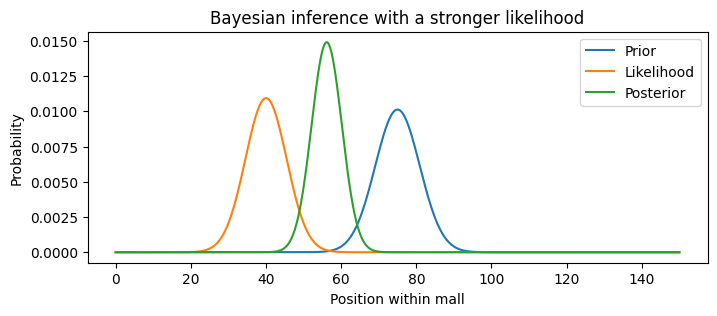

In [6]:
x = np.linspace(0, 150, 1000)
prior = norm_pdf(x, mu=75, sigma=np.sqrt(35))
likelihood = norm_pdf(x, mu=40, sigma=np.sqrt(30))
posterior = bayes_rule(likelihood, prior)

plt.subplots(figsize=(8, 3))
plt.title("Bayesian inference with a stronger likelihood")
plt.xlabel('Position within mall')
plt.ylabel('Probability')
plt.plot(x, prior, label='Prior')
plt.plot(x, likelihood, label='Likelihood')
plt.plot(x, posterior, label='Posterior')
plt.legend()
plt.show()

In [7]:
mean = np.sum(posterior * x)
var = np.sum(posterior * (x - mean)**2)
mean, var

(56.15384615384614, 16.153846153846153)

If they over-estimated how long the coffee residue was sitting there, they over-estimated the age of the coffee cup, which means they may have over-estimated how far Ajay has traveled from the cup since leaving it there. Then the likelihood should become more concentrated, reflecting greater certainty that Ajay is still in the area.

The greater certainty that Ajay is near the coffee cup moves their estimate of Ajay's location further from the prior than in part (a), and toward the peak of the likelihood. Additionally, reducing the variance of the likelihood reduces the variance of the posterior compared to part (a). Geometrically, decreasing the width of the likelihood results in less overlap between the likelihood and the prior, reducing the width of the posterior.

---

# c)

What would the posterior distribution in (a) be if the prior was nearly flat (e.g., variance $10^6$). Compare this variance to that of the posterior in (a). How does the inclusion of prior information affect the variance?

As the prior becomes flat, i.e. approaches a uniform distribution, the posterior becomes equal to the likelihood. This is because the posterior is just the likelihood re-weighted by the prior (to a proportional constant). If the prior is a uniform distribution this re-weighting has no effect on the likelihood at all.

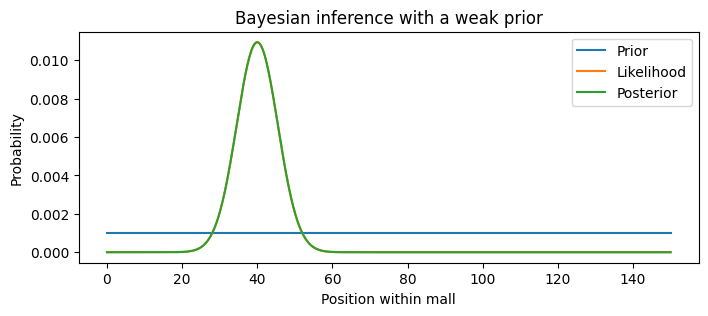

In [11]:
x = np.linspace(0, 150, 1000)
prior = norm_pdf(x, mu=75, sigma=np.sqrt(10e6))
likelihood = norm_pdf(x, mu=40, sigma=np.sqrt(30))
posterior = bayes_rule(likelihood, prior)

plt.subplots(figsize=(8, 3))
plt.title("Bayesian inference with a weak prior")
plt.xlabel('Position within mall')
plt.ylabel('Probability')
plt.plot(x, prior, label='Prior')
plt.plot(x, likelihood, label='Likelihood')
plt.plot(x, posterior, label='Posterior')
plt.legend()
plt.show()

In [12]:
mean = np.sum(posterior * x)
var = np.sum(posterior * (x - mean)**2)
mean, var

(40.00010499969018, 29.99991000006257)

This variance is large compared to the posterior variance in part (a). Thus, including prior information decreases the variance of the posterior. This makes sense as more certainty at the onset results in greater certainty following some set of observations, all else being held equal.